# Load modul/library dan dataset

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Load dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
# Cek shape gambar
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
# Shape target
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


# Preprocessing gambar

In [4]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

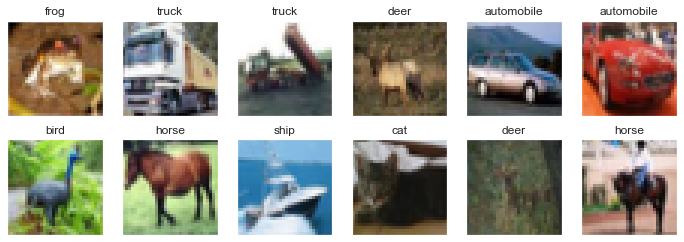

In [5]:
# Tampilkan beberapa gambar pertama
fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(12, 4))
index = 0
for i in range(2):
    for j in range(6):
        axes[i,j].set_title(label_names[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

# Ubah jadi grayscale

In [6]:
# Convert jadi grayscalse
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

# Sekarang chanel warnanya sudah hilang
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32)
(10000, 32, 32)


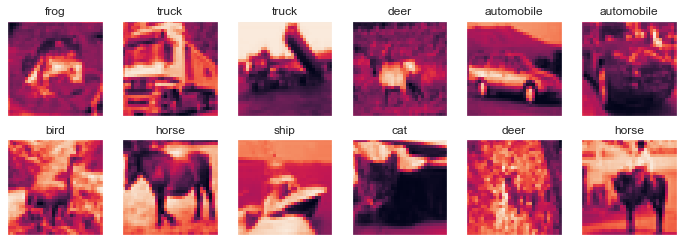

In [7]:
# Tampilkan beberapa gambar pertama
fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(12, 4))
index = 0
for i in range(2):
    for j in range(6):
        axes[i,j].set_title(label_names[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

# Normalisasi

In [8]:
print('max:', X_train.max(), ', min:', X_train.min())

# Normalisasi
X_train  = X_train/255
X_test  = X_test/255

print('max:', X_train.max(), ', min:', X_train.min())

max: 255 , min: 0
max: 1.0 , min: 0.0


# Preprocessing label

In [9]:
print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [10]:
# Kita bisa pakai OneHotEncoder dari modul Sklearn
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit data berdasarkan y_train (belum mengubah y_train jadi one-hot)
one_hot_encoder.fit(y_train)

# Sekarang baru y_train dan y_test berubah jadi one-hot
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [11]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Membuat model CNN

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [13]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [14]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', 
                 padding='same', input_shape=(32, 32, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', 
                 padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', 
                 padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', 
                 padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', 
                 padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', 
                 padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [16]:
# compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [18]:
history = model.fit(X_train, y_train, epochs=4, 
                    batch_size=64, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 44s 873us/step - loss: 1.6274 - acc: 0.4076 - val_loss: 1.2790 - val_acc: 0.5521
Epoch 2/4
50000/50000 [==============================] - 34s 690us/step - loss: 1.1091 - acc: 0.6084 - val_loss: 1.0081 - val_acc: 0.6536
Epoch 3/4
50000/50000 [==============================] - 36s 710us/step - loss: 0.8569 - acc: 0.7038 - val_loss: 0.8455 - val_acc: 0.7110
Epoch 4/4
50000/50000 [==============================] - 35s 698us/step - loss: 0.7048 - acc: 0.7574 - val_loss: 0.7749 - val_acc: 0.7318


# Prediksi & Confusion matrix

In [19]:
predictions = model.predict(X_test)
print(predictions[0])

[0.00089535 0.01187814 0.00790687 0.41804826 0.00640871 0.15716498
 0.08123462 0.00195455 0.25854596 0.05596255]


In [20]:
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

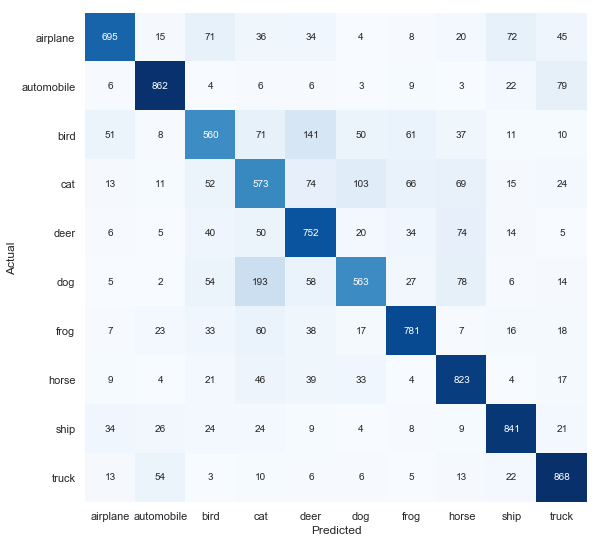

In [21]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=label_names, yticklabels=label_names, 
            fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

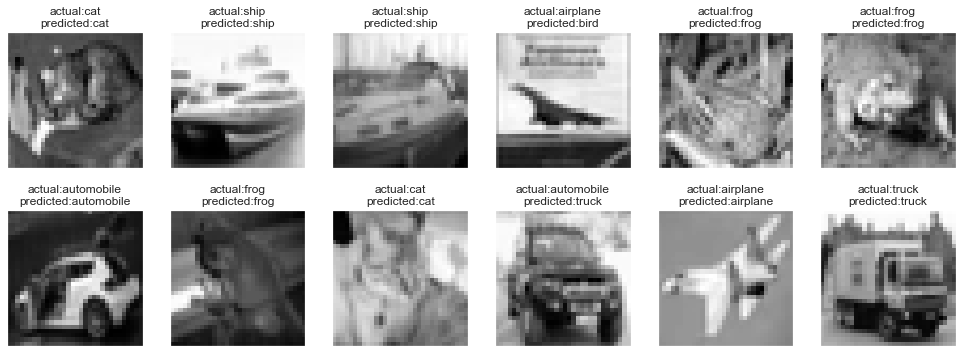

In [22]:
# Reshape lagi ke (10000, 32, 32) karena kalau ga gini ga bakal terdisplay 
# (sebelumnya (10000,32,32,1))
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

fig, axes = plt.subplots(ncols=6, nrows=2, sharex=False,
    sharey=True, figsize=(17, 6))
index = 0
for i in range(2):
    for j in range(6):
        axes[i,j].set_title('actual:' + label_names[y_test[index][0]] + '\n' 
                            + 'predicted:' + label_names[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()